## Ejemplo a mano


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

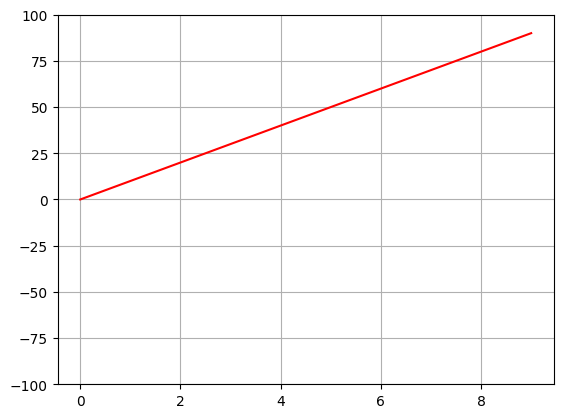

In [121]:
# Graficar una recta con su ecuación
# y = mx + b

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
m = 10
b = 0
y = m * x + b

plt.plot(x, y, color='red')
plt.grid()
plt.ylim(-100, 100)
plt.show()

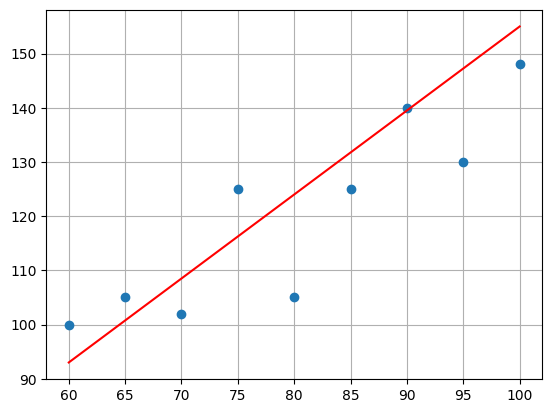

In [131]:
x = np.array([60, 65, 70, 75, 80, 85, 90, 95, 100])
y = np.array([100, 105, 102, 125, 105, 125, 140, 130, 148])

m = 1.55
b = 0

recta = m * x + b

plt.plot(x, y, 'o')
plt.plot(x, recta, color='red')
plt.grid()
plt.show()

In [135]:
x.sum(), len(x), y.sum()

(720, 9, 1080)

In [137]:
(x**2).sum(), (x*y).sum()

(59100, 88115)

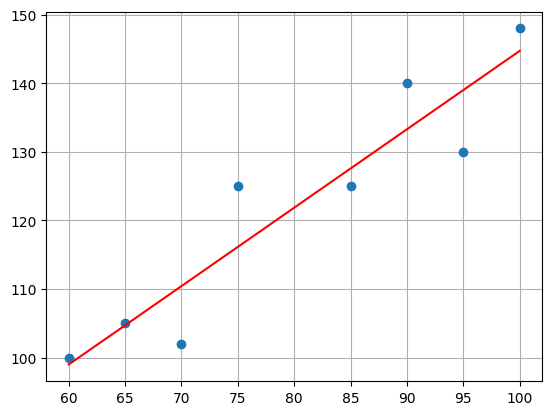

In [159]:
x = np.array([60, 65, 70, 75, 85, 90, 95, 100])
y = np.array([100, 105, 102, 125, 125, 140, 130, 148])

m = 343/300
b = 30.40

recta = m*x + b

plt.plot(x, y, 'o')
plt.plot(x, recta, color='red')
plt.grid()

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
modelo_lineal = LinearRegression()


In [156]:
modelo_lineal.fit(x.reshape(-1, 1), y)

LinearRegression()

In [157]:
modelo_lineal.coef_
modelo_lineal.intercept_

30.40833333333336

In [158]:
print(modelo_lineal.coef_)
print(modelo_lineal.intercept_)

[1.14333333]
30.40833333333336


In [160]:
modelo_lineal.score(x.reshape(-1, 1), y)

0.8695899624886819

In [196]:
modelo_lineal.predict([[200]])

array([259.075])

In [197]:
m = 343/300
b = 30.40

m * 200 + b

259.06666666666666

In [184]:
# Error cuadratico medio 
predicciones = modelo_lineal.predict(x.reshape(-1, 1))

((y - predicciones)**2).sum() / (len(y)), ((y - predicciones)**2).mean()


(36.75729166666666, 36.75729166666666)

In [188]:
# Error absoluto medio
np.abs(y - predicciones).mean()

5.014583333333331

In [192]:
print('Score del modelo: ', modelo_lineal.score(x.reshape(-1, 1), y))
print('Error cuadrático medio: ', np.mean((modelo_lineal.predict(x.reshape(-1, 1)) - y) ** 2))
print('Error absoluto medio: ', np.abs(y - predicciones).mean())
print('Coeficiente de determinación: ', 1 - np.sum((modelo_lineal.predict(x.reshape(-1, 1)) - y) ** 2) / np.sum((y - np.mean(y)) ** 2))


Score del modelo:  0.8695899624886819
Error cuadrático medio:  36.75729166666666
Error absoluto medio:  5.014583333333331
Coeficiente de determinación:  0.8695899624886819


In [202]:

x = np.array([0, 2, 2.5, 1, 4, 7])
y = np.array([5, 10, 9, 0, 3, 27])
z = np.array([0, 1, 2, 3, 6, 2])


In [203]:
import pandas as pd


In [205]:
df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df

,x,y,z
0,0.0,5,0
1,2.0,10,1
2,2.5,9,2
3,1.0,0,3
4,4.0,3,6
5,7.0,27,2


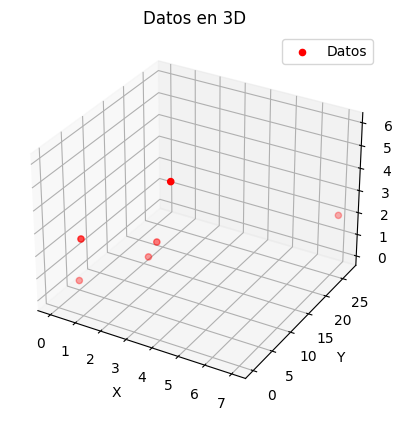

In [206]:
# Graficamos los puntos en un plano 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', label = 'Datos')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.title('Datos en 3D')
plt.show()



In [207]:
fig = px.scatter_3d(x = x, y = y, z = z, height = 500, width = 500)
fig.update_layout(title = 'Datos en 3D')

In [ ]:
# Recta = mx + b
# Plano = m_1x_1 + m_2x_2 + b
# Hyperplano = m_1x_1 + m_2x_2 + m_3x_3 + ... + m_nx_n + b


In [208]:
# Regresión lineal
# Vamos a predecir la variable y a partir de las variables x e z
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# predictores = np.array([x, z]).T
# objetivo = y
# print(predictores)
# print(objetivo)

###############################
# Esto es lo mismo que lo anterior, pero esto es lo que haremos en todo el curso
predictores = df[['x', 'z']]
objetivo = df['y']

model.fit(predictores, objetivo)

LinearRegression()

In [210]:
df['predicciones'] = model.predict(predictores)
df

,x,y,z,predicciones
0,0.0,5,0,5.000000e+00
1,2.0,10,1,1.000000e+01
2,2.5,9,2,9.000000e+00
3,1.0,0,3,-1.776357e-15
4,4.0,3,6,3.000000e+00
5,7.0,27,2,2.700000e+01


In [212]:
# Obtener los coeficientes de la regresión y el intercepto
print('Coeficientes: ', model.coef_)
print('Intercepto: ', model.intercept_)
print('Predicción para x = 3, z = 5: ', model.predict([[1, 3]]))

Coeficientes:  [ 4. -3.]
Intercepto:  5.000000000000001
Predicción para x = 3, z = 5:  [-1.77635684e-15]


In [213]:
# y = m1*x1 + m2*x2 + b
(1 * 4) + (3 * (-3)) + 5
# Esta es la predicción que nos da el modelo

0

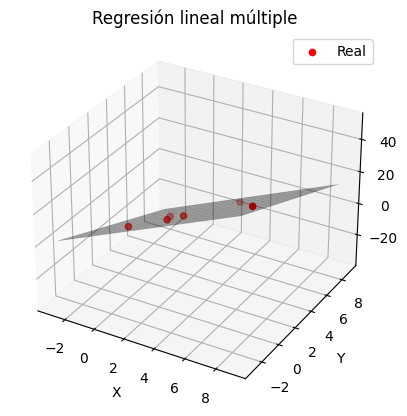

In [214]:
# Graficamos los puntos reales y un plano de regresión
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, z, y, c = 'r', label='Real')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plano de regresión
x_surf = np.arange(-3, 10, 1)
z_surf = np.arange(-3, 10, 1)
x_surf, z_surf = np.meshgrid(x_surf, z_surf)
ax.plot_surface(x_surf, z_surf, model.predict(np.array([x_surf.ravel(), z_surf.ravel()]).T).reshape(x_surf.shape), color='None', alpha=0.4) 
plt.legend()
plt.title('Regresión lineal múltiple')
plt.show()



In [216]:
fig = px.scatter_3d(x = x, y = z, z = y, height = 500, width = 500)
# Añadimos el plano de regresión
fig.add_trace(go.Surface(x = x_surf, y = z_surf, z = model.predict(np.array([x_surf.ravel(), z_surf.ravel()]).T).reshape(x_surf.shape), opacity = 0.4))




In [217]:
# Obtener el score de la regresión y el error cuadrático medio
print('Score: ', model.score(predictores, y))
print('Error cuadrático medio: ', np.mean((model.predict(np.array([x, z]).T) - y) ** 2))

# Obtener el coeficiente de determinación
print('Coeficiente de determinación: ', 1 - np.sum((model.predict(np.array([x, z]).T) - y) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Obtener el coeficiente de correlación
print('Coeficiente de correlación: ', np.corrcoef(model.predict(np.array([x, z]).T), y)[0, 1])


Score:  1.0
Error cuadrático medio:  1.0781099038020494e-29
Coeficiente de determinación:  1.0
Coeficiente de correlación:  1.0


In [89]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

1. Coeficiente de determinación (R²): es una medida del porcentaje de variación en la variable objetivo explicada por las variables predictoras en un modelo de regresión. El valor de R² varía entre 0 y 1, donde un valor de 1 indica que el modelo explica completamente la variación en la variable objetivo, mientras que un valor de 0 indica que el modelo no explica ninguna variación en la variable objetivo. El coeficiente de determinación se calcula dividiendo la varianza explicada por el modelo entre la varianza total de la variable objetivo.

2. Coeficiente de correlación (r): es una medida de la fuerza y la dirección de la relación entre dos variables. El valor de r varía entre -1 y 1, donde un valor de 1 indica una relación positiva perfecta, un valor de -1 indica una relación negativa perfecta, y un valor de 0 indica una ausencia de relación. El coeficiente de correlación se calcula utilizando la covarianza entre dos variables dividida por el producto de sus desviaciones estándar.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Horas de estudio, Calificación
# 2, 60
# 3, 70
# 4, 80
# 5, 85
# 6, 90
# 7, 92
# 8, 94
# 9, 96
# 10, 98
# 12, 100

horas = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 12]) #x
calificaciones = np.array([60, 70, 80, 85, 90, 92, 94, 96, 98, 100]) #y

## **Inicializa el modelo**: Crea una instancia del modelo de regresión lineal.

In [9]:
modelo = LinearRegression()

## **Define la variable objetivo y los predictores**: Define la variable objetivo (las calificaciones) y los predictores (las horas de estudio).

In [13]:
modelo.fit(horas.reshape(-1, 1), calificaciones)

LinearRegression()

In [15]:
#Score
modelo.score(horas.reshape(-1,1), calificaciones)

0.8509869987702501

In [17]:
#modelo.predict()
modelo.predict(horas.reshape(-1,1))

array([ 69.27489177,  73.01948052,  76.76406926,  80.50865801,
        84.25324675,  87.9978355 ,  91.74242424,  95.48701299,
        99.23160173, 106.72077922])

In [18]:
#Error cuadrático medio
predicciones = modelo.predict(horas.reshape(-1,1))

((calificaciones - predicciones)**2).mean()

22.68722943722942

In [19]:
(np.abs(calificaciones - predicciones)).mean()

4.0493506493506475

In [22]:
#modelo.predict([[5]])
modelo.predict([[5]])

array([80.50865801])

In [23]:
modelo.coef_, modelo.intercept_

(array([3.74458874]), 61.785714285714285)

## **Ajusta el modelo**: Ajusta el modelo de regresión lineal con tus datos.

Instrucciones para los estudiantes:


4. **Obtén los coeficientes e intercepto**: Después de ajustar el modelo, obtén los coeficientes e intercepto del modelo.

5. **Visualiza los resultados**: Utiliza matplotlib para crear un gráfico de dispersión de las horas de estudio vs las calificaciones. También, traza la línea de regresión.

6. **Calcula el R cuadrado y la raíz cuadrada de R cuadrado**: Utiliza el método `score` del modelo para calcular el R cuadrado. Luego, calcula la raíz cuadrada de R cuadrado.

7. **Calcula el error cuadrático medio**: Calcula el error cuadrático medio entre las calificaciones reales y las predichas por el modelo.

8. **Realiza una predicción**: Finalmente, utiliza el modelo para predecir la calificación para un número específico de horas de estudio.

## segundo ejercicio

In [58]:
# Año, Millaje, Precio
# 2010, 150000, 5000
# 2011, 100000, 6000
# 2012, 80000, 7000
# 2013, 60000, 8000
# 2014, 40000, 9000
# 2015, 30000, 10000
# 2016, 20000, 11000
# 2017, 15000, 12000
# 2018, 10000, 13000
# 2019, 5000, 14000

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

años = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
millaje = [150000, 100000, 80000, 60000, 40000, 30000, 20000, 15000, 10000, 5000]
precio = [5000, 6000, 5000, 8000, 8000, 10000, 13000, 12000, 11000, 14000]


In [108]:
variables = {#"años": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 
            "millaje":[150000, 100000, 80000, 60000, 40000, 30000, 20000, 15000, 10000, 5000], 
            "precio":[5000, 6000, 5000, 8000, 8000, 10000, 13000, 12000, 11000, 14000]}

In [109]:
df = pd.DataFrame(variables)
df

,millaje,precio
0,150000,5000
1,100000,6000
2,80000,5000
3,60000,8000
4,40000,8000
5,30000,10000
6,20000,13000
7,15000,12000
8,10000,11000
9,5000,14000


In [110]:
modelo_lineal_ingrid = LinearRegression()

In [119]:
#variables x y y
y = df['precio'] #la y es siempre la variable objetivo
X = df[['millaje']]

#definicion de variables
modelo_lineal_ingrid.fit(X, y)

LinearRegression()

In [112]:
#score
modelo_lineal_ingrid.score(X, y)

0.7750780640124904

In [113]:
modelo_lineal_ingrid.predict(X)

array([ 3071.42857143,  6166.66666667,  7404.76190476,  8642.85714286,
        9880.95238095, 10500.        , 11119.04761905, 11428.57142857,
       11738.0952381 , 12047.61904762])

In [114]:
#Error cuadrático medio, la variable objetivo - la predicción
#instaciamos predicciones
predicciones = modelo_lineal_ingrid.predict(X)

((precio - predicciones)**2).mean()

2195238.0952380947

In [115]:
(np.abs(precio - predicciones)).mean()

1266.666666666667

In [116]:
#modelo.predict([[5]])
modelo.predict([[5000]])

array([18784.72943723])

In [117]:
modelo_lineal_ingrid.coef_, modelo_lineal_ingrid.intercept_

(array([-0.06190476]), 12357.142857142859)

Instrucciones para los estudiantes:

1. **Importa las bibliotecas necesarias**: Importa las bibliotecas numpy, sklearn.linear_model y matplotlib.pyplot.

2. **Define los datos**: Define tres listas: 'años', 'millaje' y 'precio'. Estas listas representan los años del automóvil, el millaje del automóvil y el precio del automóvil, respectivamente.

3. **Inicializa el modelo**: Crea una instancia del modelo de regresión lineal.

4. **Define la variable objetivo y los predictores**: Define la variable objetivo (el precio) y los predictores (los años y el millaje).

5. **Ajusta el modelo**: Ajusta el modelo de regresión lineal con tus datos.

6. **Obtén los coeficientes e intercepto**: Después de ajustar el modelo, obtén los coeficientes e intercepto del modelo.

7. **Visualiza los resultados**: Utiliza matplotlib para crear gráficos que muestren la relación entre el precio y los años, y entre el precio y el millaje. También, traza las líneas de regresión.

8. **Calcula el R cuadrado**: Utiliza el método `score` del modelo para calcular el R cuadrado para cada regresión.

9. **Realiza una predicción**: Finalmente, utiliza el modelo para predecir el precio de un automóvil dado su año y millaje.